In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [35]:
data = pd.read_csv('/Users/harshitmasiwal/Downloads/Historical Product Demand.csv')
data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


#  A quick insightful statistical summary

In [37]:
data.describe().transpose()


,count,unique,top,freq
Product_Code,1048575,2160,Product_1359,16936
Warehouse,1048575,4,Whse_J,764447
Product_Category,1048575,33,Category_019,481099
Date,1037336,1729,2013/9/27,2075
Order_Demand,1048575,3828,1000,112682


# Duplicates are present in the dataset

In [38]:
data[data.duplicated()==True]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
10,Product_0979,Whse_J,Category_028,2012/8/29,500
39,Product_1159,Whse_J,Category_006,2012/8/30,50000
51,Product_1157,Whse_J,Category_006,2012/3/8,150000
55,Product_1157,Whse_J,Category_006,2012/6/4,160000
67,Product_1274,Whse_J,Category_019,2012/1/24,1000
...,...,...,...,...,...
1048508,Product_1148,Whse_J,Category_006,2016/9/1,5000
1048521,Product_1391,Whse_J,Category_019,2016/6/3,100
1048531,Product_1391,Whse_J,Category_019,2016/8/22,100
1048568,Product_1759,Whse_J,Category_001,2016/8/17,1


# dropping the duplicates

In [39]:
data = data.drop_duplicates()

# Missing values are also present in the dataset

In [40]:
data.isnull().sum()

Product_Code           0
Warehouse              0
Product_Category       0
Date                1880
Order_Demand           0
dtype: int64

 # Changing datetime object type

In [41]:
data.loc[:,'Date'] = pd.to_datetime(data.loc[:,'Date'], format='%Y/%m/%d', errors='coerce')
data['Date']

0          2012-07-27 00:00:00
1          2012-01-19 00:00:00
2          2012-02-03 00:00:00
3          2012-02-09 00:00:00
4          2012-03-02 00:00:00
                  ...         
1048569    2016-11-10 00:00:00
1048571    2016-04-27 00:00:00
1048572    2016-04-28 00:00:00
1048573    2016-10-07 00:00:00
1048574    2016-06-27 00:00:00
Name: Date, Length: 926152, dtype: object

In [42]:
data.isnull().sum()

Product_Code           0
Warehouse              0
Product_Category       0
Date                1880
Order_Demand           0
dtype: int64

# dropping the NaN Values

In [46]:

if 'Date' in data.columns:
    data = data.dropna(subset=['Date']).copy()
data.isnull().sum()



Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

# filling the missing values present in the date

In [47]:
start_date = pd.to_datetime('2012-01-01')
end_date = pd.to_datetime('2016-12-31')
data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

In [50]:
data.isnull().sum()   

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64


# Adding some columns like weekdays, years, weekends

In [52]:
wkday = []
for i in range(len(data)):
    wkday.append(data['Date'].iloc[i].weekday())
yr = []
for i in range(len(data)):
    yr.append(data['Date'].iloc[i].year)

mon = []
for i in range(len(data)):
    mon.append(data['Date'].iloc[i].month)

In [53]:
data.loc[:,'weekday'] = wkday
data.loc[:,'year'] = yr
data.loc[:,'month'] = mon

In [57]:
print(data.columns)
print(data.index)



Index(['Product_Code', 'Warehouse', 'Product_Category', 'Order_Demand',
       'weekday', 'year', 'month'],
      dtype='object')
DatetimeIndex(['2012-07-27', '2012-01-19', '2012-02-03', '2012-02-09',
               '2012-03-02', '2012-04-19', '2012-06-05', '2012-06-27',
               '2012-07-23', '2012-08-29',
               ...
               '2016-10-12', '2016-11-11', '2016-11-11', '2016-11-02',
               '2016-07-07', '2016-11-10', '2016-04-27', '2016-04-28',
               '2016-10-07', '2016-06-27'],
              dtype='datetime64[ns]', name='Date', length=923607, freq=None)


In [63]:
data.set_index('Date',inplace=True)


In [64]:
data.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,weekday,year,month
Date,,,,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100,4,2012,7
2012-01-19,Product_0979,Whse_J,Category_028,500,3,2012,1
2012-02-03,Product_0979,Whse_J,Category_028,500,4,2012,2
2012-02-09,Product_0979,Whse_J,Category_028,500,3,2012,2
2012-03-02,Product_0979,Whse_J,Category_028,500,4,2012,3


In [77]:
def weekend(day):
    if day == 5 or day == 6:
        return 1
    else:
        return 0

In [81]:
data.loc[:,'Weekend'] = data['weekday'].apply(weekend)

In [79]:
data[data['Weekend'] == 1].head()


,Product_Code,Warehouse,Product_Category,Order_Demand,weekday,year,month,Weekend
Date,,,,,,,,
2012-08-25,Product_1241,Whse_S,Category_019,30000,5,2012,8,1
2012-08-25,Product_1570,Whse_S,Category_019,90000,5,2012,8,1
2012-08-25,Product_1904,Whse_S,Category_019,100000,5,2012,8,1
2012-11-04,Product_1241,Whse_S,Category_019,100000,6,2012,11,1
2012-11-04,Product_1570,Whse_S,Category_019,85000,6,2012,11,1


In [76]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Order_Demand',
       'weekday', 'year', 'month', 'Weekend'],
      dtype='object')

In [82]:
data['Warehouse'].value_counts(ascending=False)

Warehouse
Whse_J    665388
Whse_A    130618
Whse_S     86042
Whse_C     41559
Name: count, dtype: int64

# Extracting rows corresponding to Warehouse J

In [83]:
dataJ = data[data['Warehouse']== 'Whse_J']

In [84]:
dataJ.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,weekday,year,month,Weekend
Date,,,,,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100,4,2012,7,0
2012-01-19,Product_0979,Whse_J,Category_028,500,3,2012,1,0
2012-02-03,Product_0979,Whse_J,Category_028,500,4,2012,2,0
2012-02-09,Product_0979,Whse_J,Category_028,500,3,2012,2,0
2012-03-02,Product_0979,Whse_J,Category_028,500,4,2012,3,0


# Key Observations:
 1. Focused on Warehouse J to study warehouse-specific demand patterns.
 2. Multiple products exist, mainly Category_028 in this subset.
 3. Order demand varies (100 to 500 units), showing high variability.
 4. Columns like 'day', 'month', 'year', and 'weekend' allow time-based analysis.
 5. Data is indexed by 'Date', useful for trends and forecasting.

 # Grouping the data by Date, Product_Category, Warehouse and Order_Demand

In [85]:
# Group by Date, Product_Category, and Warehouse to get daily total demand
# This ensures each group has a single value for forecasting and trend analysis
tdata = data.groupby(['Date', 'Product_Category', 'Warehouse'])['Order_Demand'].sum().reset_index()

In [86]:
tdata.head()

,Date,Product_Category,Warehouse,Order_Demand
0,2012-01-01,Category_024,Whse_S,2
1,2012-01-02,Category_001,Whse_S,4 3 100
2,2012-01-02,Category_005,Whse_S,2000 500 1000
3,2012-01-02,Category_006,Whse_S,8000 2500 2500
4,2012-01-02,Category_011,Whse_S,5 20


 # Key Observations 

Each row represents an order for a specific Product_Category in a Warehouse on a given Date.
Multiple rows can exist for the same date and warehouse (e.g., 2012-01-02 has multiple categories).
'Order_Demand' values vary greatly:
 Some are small (e.g., 2, 4, 5 units)
 Some are very large (e.g., 8000, 2000)
 This indicates high variability in demand between products.
 Some rows show multiple values in 'Order_Demand' (e.g., 2000 500 1000), which might be a data entry issue.
 Warehouses are labeled (e.g., 'Whse_S'), which allows warehouse-level analysis.
The dataset is time-indexed by 'Date', useful for trend, seasonal, and forecasting analysis.


# Displaying the Warehouse with minimum Order Demand

In [87]:
min_order = tdata.loc[tdata['Order_Demand'].idxmin()]
min_order   

Date                2012-03-15 00:00:00
Product_Category           Category_003
Warehouse                        Whse_J
Order_Demand                        (1)
Name: 2762, dtype: object

# Displaying the Warehouse with maximum Order Demand

In [88]:
max_order = tdata.loc[tdata['Order_Demand'].idxmax()]
max_order

Date                2015-04-16 00:00:00
Product_Category           Category_011
Warehouse                        Whse_S
Order_Demand                       999 
Name: 47226, dtype: object

33


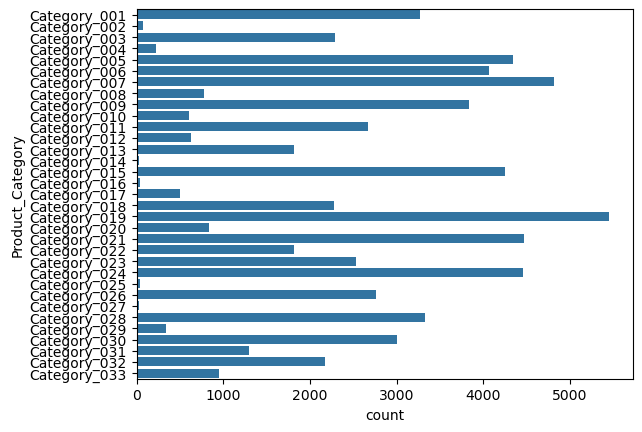

In [91]:
print (len(tdata['Product_Category'].value_counts()))

sns.countplot(tdata['Product_Category'].sort_values(ascending = True))
plt.show()


Category19 has a lot of orders

# Converting Categorical Variables into Numerical Variables

In [92]:
data['Order_Demand'] = pd.to_numeric(data['Order_Demand'],errors='coerce')


In [93]:
le = LabelEncoder()

data['Product_Code'] = le.fit_transform(data['Product_Code'])
data['Warehouse'] = le.fit_transform(data['Warehouse'])
data['Product_Category'] = le.fit_transform(data['Product_Category'])

In [94]:
data.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,weekday,year,month,Weekend
Date,,,,,,,,
2012-07-27,982,2,27,100.0,4,2012,7,0
2012-01-19,968,2,27,500.0,3,2012,1,0
2012-02-03,968,2,27,500.0,4,2012,2,0
2012-02-09,968,2,27,500.0,3,2012,2,0
2012-03-02,968,2,27,500.0,4,2012,3,0


# Plotting the Monthly Order Demand Trend Over the Years

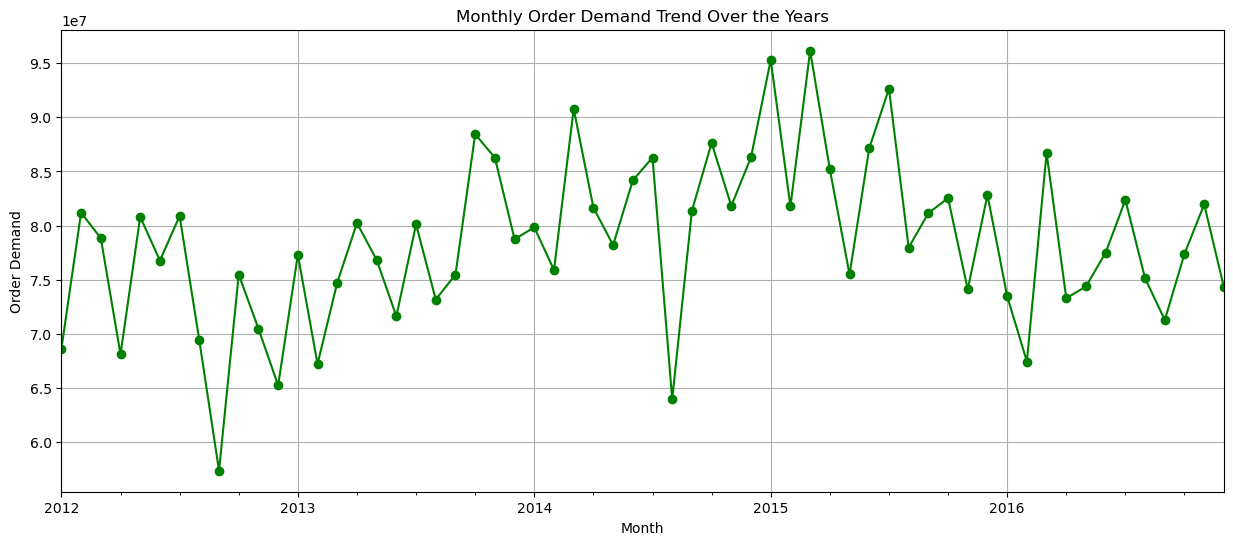

In [ ]:
monthly_data = data['Order_Demand'].resample('ME').sum()
plt.figure(figsize=(15,6))
monthly_data.plot(kind='line', marker='o', c='green')
plt.title('Monthly Order Demand Trend Over the Years')
plt.xlabel('Month')
plt.ylabel('Order Demand')
plt.grid(True)
plt.show()


# Plotting the Weekly Order Demand Trend Over Time
Weekly data illustrates the seasonality much better than monthly data, but we'll work with monthly data because handling large lag values in weekly data is difficult

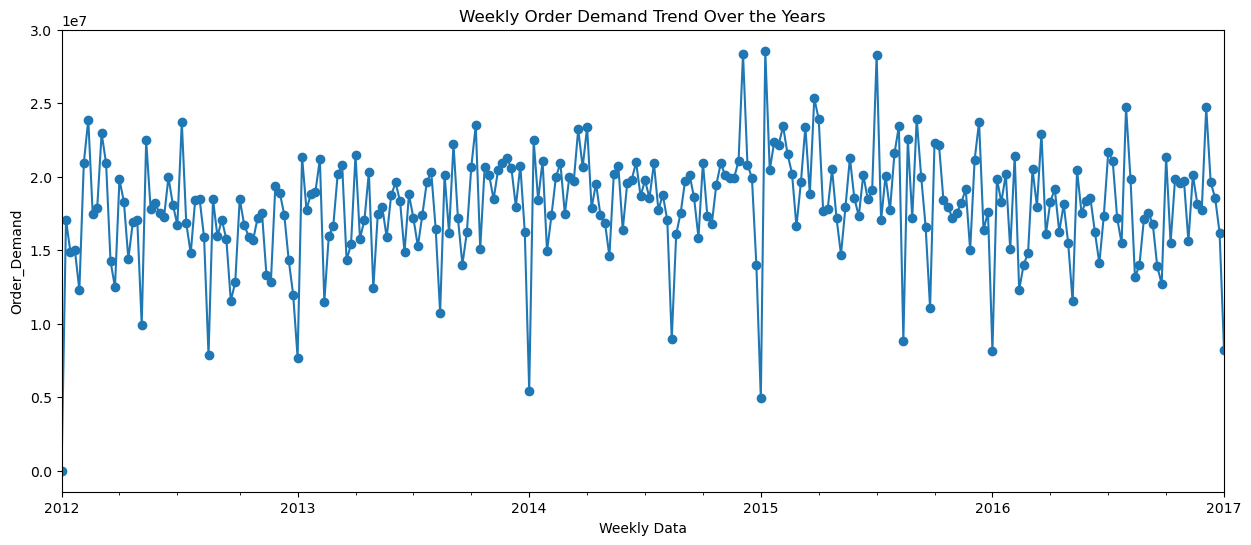

In [97]:
w_data = data['Order_Demand'].resample('W').sum()

plt.figure(figsize=(15,6))
w_data.plot(kind='line', marker='o')
plt.title('Weekly Order Demand Trend Over the Years')
plt.xlabel('Weekly Data')
plt.ylabel('Order_Demand')
plt.show()

# Perform the Augmented Dickey-Fuller test to check for stationarity

In [ ]:
result = adfuller(monthly_data)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] < 0.05:
    print("Stationary.")
else:
    print("Non-stationary.") 

ADF Statistic: -2.112796
p-value: 0.239401
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595
Non-stationary.


# Observations from Augmented Dickey-Fuller Test:
ADF Statistic: -2.112796 (not very negative)
 p-value: 0.239401 (greater than 0.05)
#  Critical Values: 
#     1%: -3.551
#     5%: -2.914
#     10%: -2.595
The p-value is much higher than 0.05, and the ADF Statistic is above the critical values.
 Conclusion: The time series is non-stationary (it has trends or changing variance).
Next step: Apply differencing or transformation to make the series stationary before forecasting.


# Plotting ACF and PACF of the monthly data of the Order Demand
Understanding ACF and PACF as it is vital for analyzing time series data.



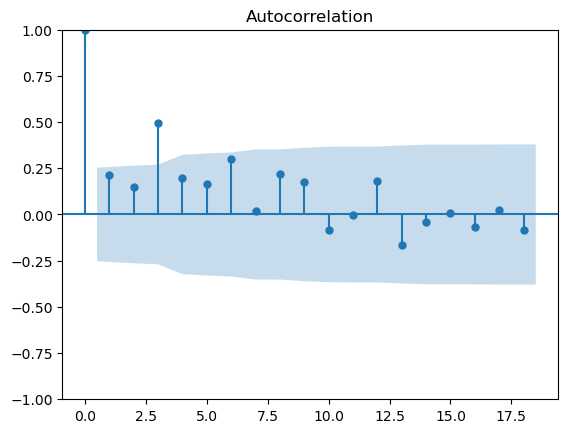

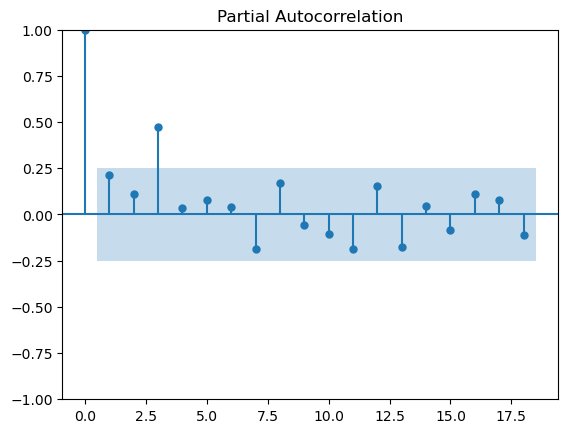

In [100]:
plot_acf(monthly_data)
plot_pacf(monthly_data)
plt.show()